# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler


### Função de plotagem de gráfico de média mensal de temperatura dos dados do PIRATA

In [2]:
def plot_pirata_media(file, initial_range = '2000-01-01', final_range='2018-01-01'):    
    pirata_df = pd.read_csv("pirata_db/"+file, index_col=1, parse_dates=['datahora'])
    pirata_df = pirata_df.replace(-99999.0, np.nan)
    pirata_df = pirata_df.loc[initial_range:final_range]
    #Ao invés de dados diários, é feito um resample para média mensal
    monthly = pirata_df.resample('m').mean()

    x = monthly.index
    y_t_1 = monthly["t_1"]
    y_t_5 = monthly["t_5"]
    y_t_10 = monthly["t_10"]
    y_t_13 = monthly["t_13"]
    y_t_40 = monthly["t_40"]
    y_t_80 = monthly["t_80"]
    y_t_100 = monthly["t_100"]
    y_t_120 = monthly["t_120"]
    y_t_180 = monthly["t_180"]
    y_t_300 = monthly["t_300"]
    y_t_500 = monthly["t_500"]


    plt.figure(figsize=(12, 6))
    plt.plot(x, y_t_1, label="t_1")
    plt.plot(x, y_t_5, label="t_5")
    plt.plot(x, y_t_10, label="t_10")
    plt.plot(x, y_t_13, label="t_13")
    plt.plot(x, y_t_40, label="t_40")
    plt.plot(x, y_t_80, label="t_80")
    plt.plot(x, y_t_100, label="t_100")
    plt.plot(x, y_t_120, label="t_120")
    plt.plot(x, y_t_180, label="t_180")
    plt.plot(x, y_t_300, label="t_300")
    plt.plot(x, y_t_500, label="t_500")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.74))
    plt.xticks(rotation=45)
    plt.title(file)
    plt.show()

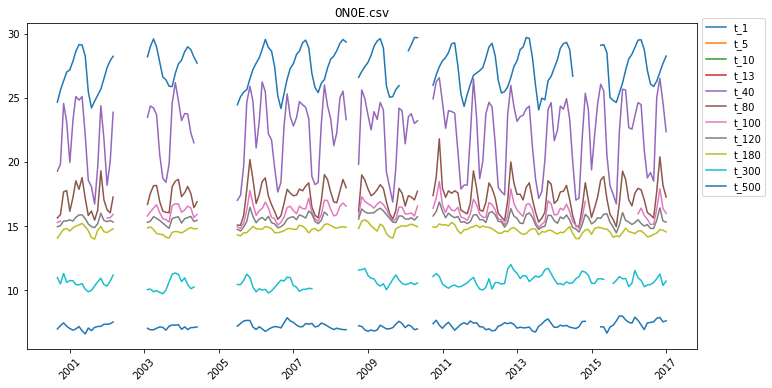

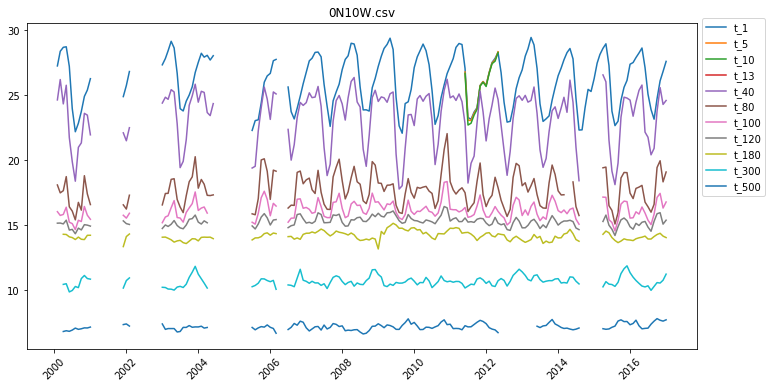

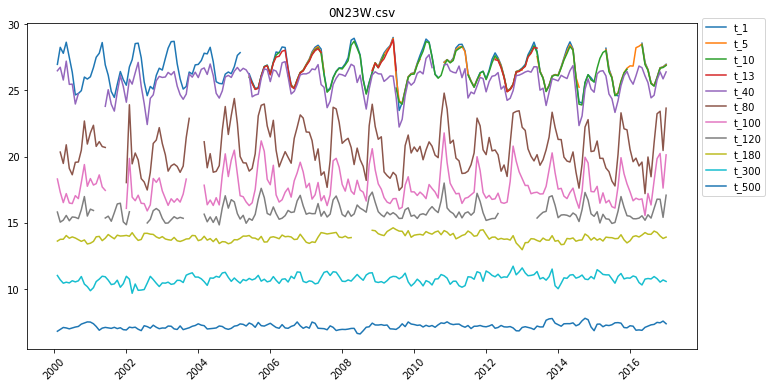

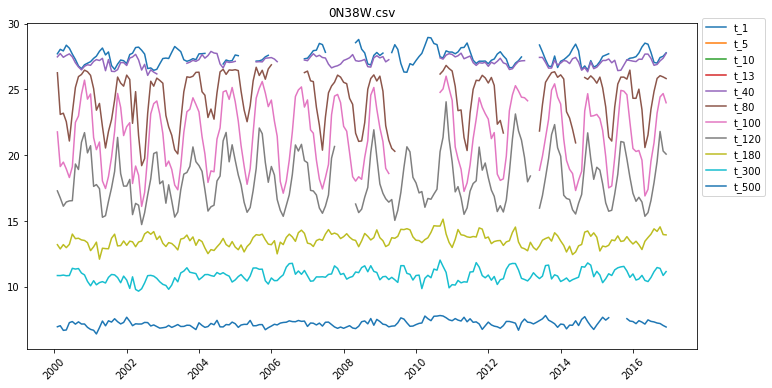

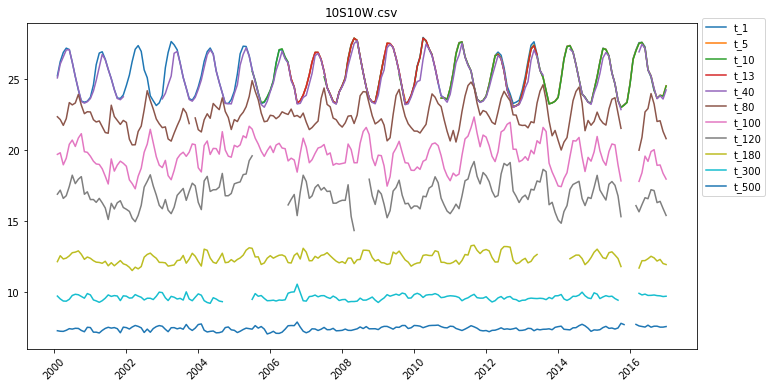

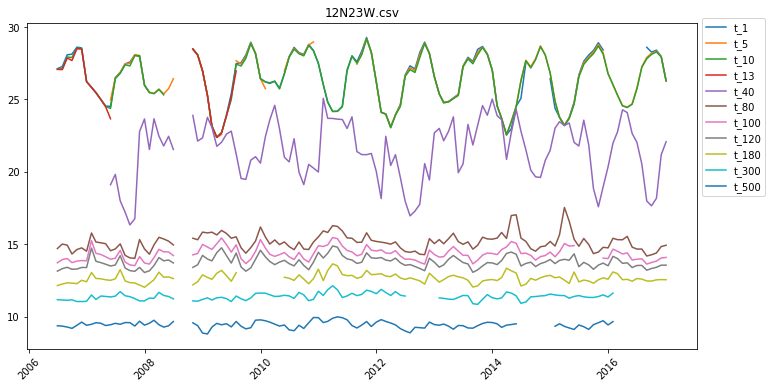

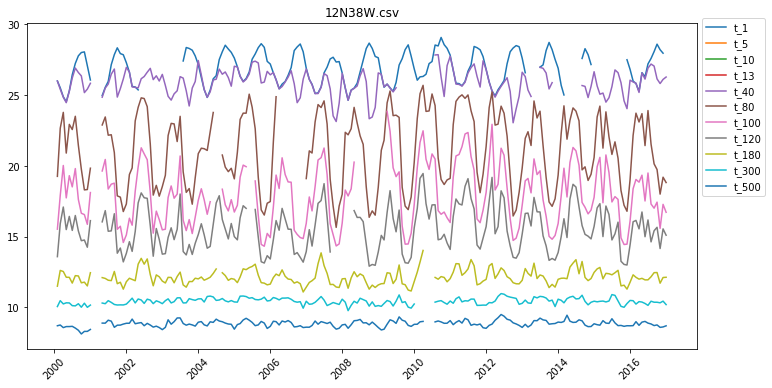

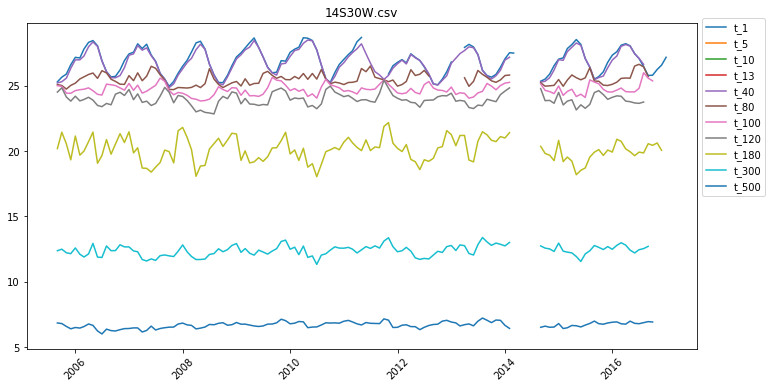

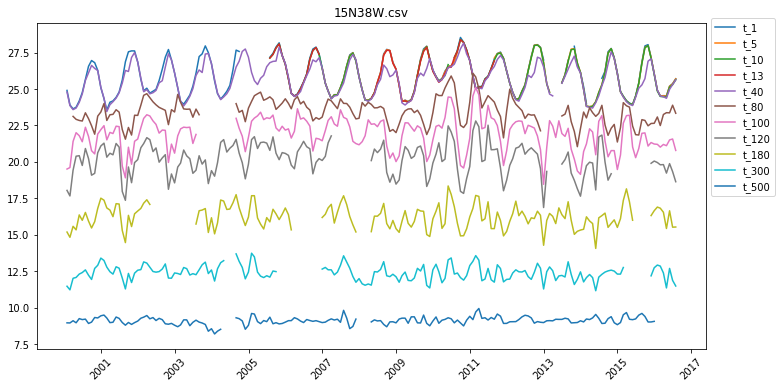

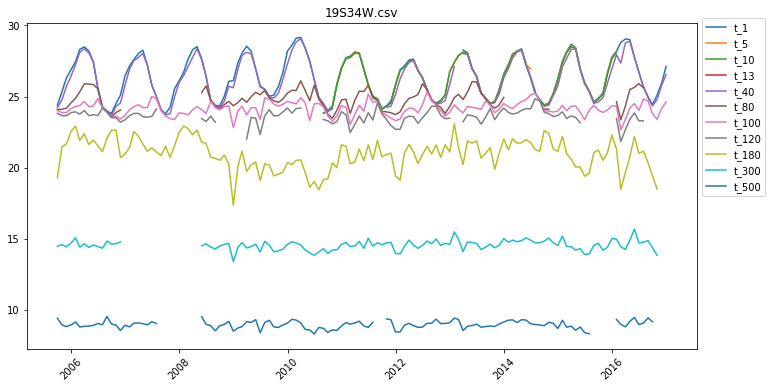

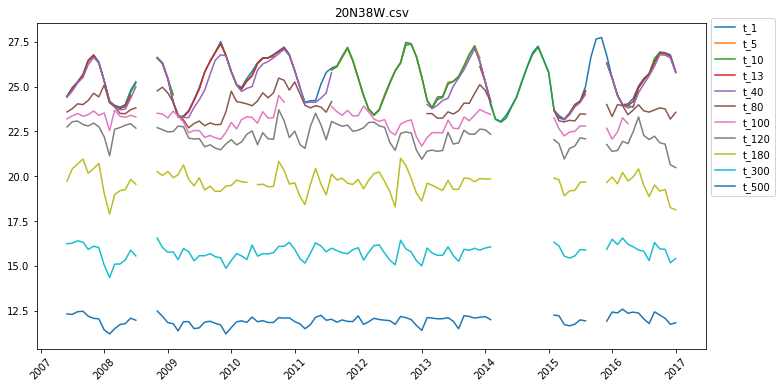

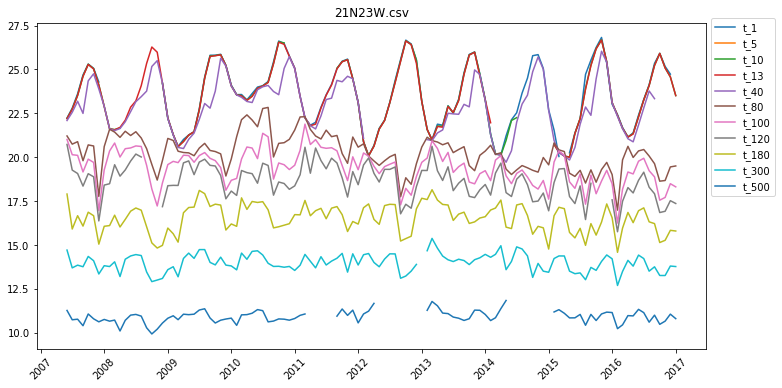

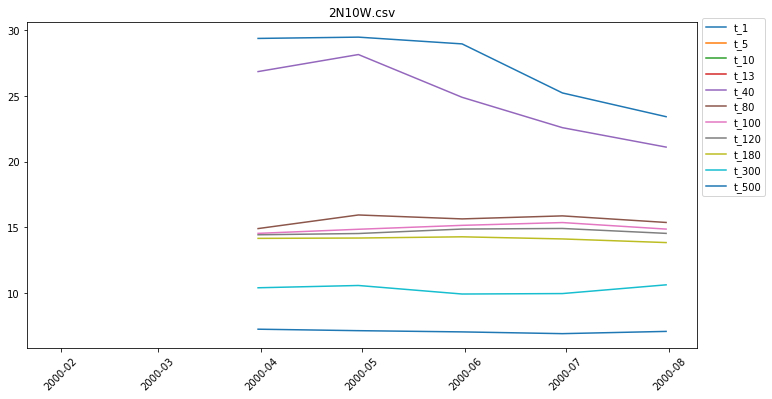

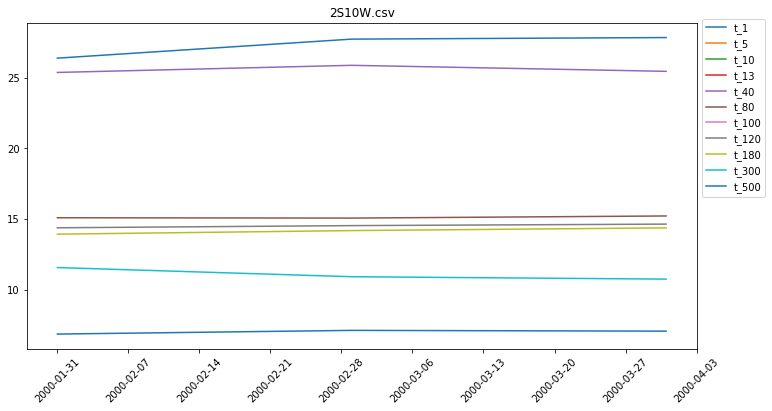

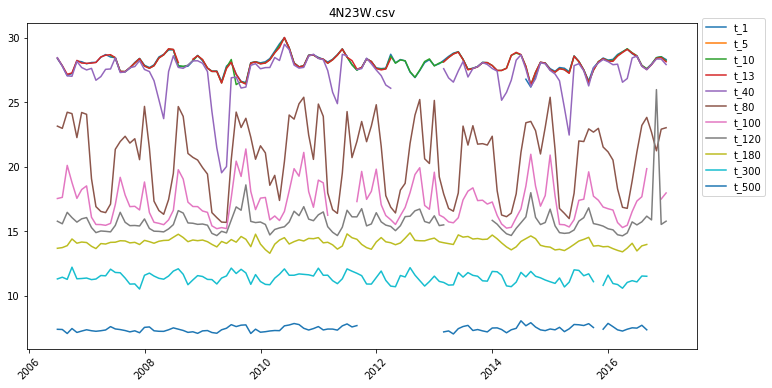

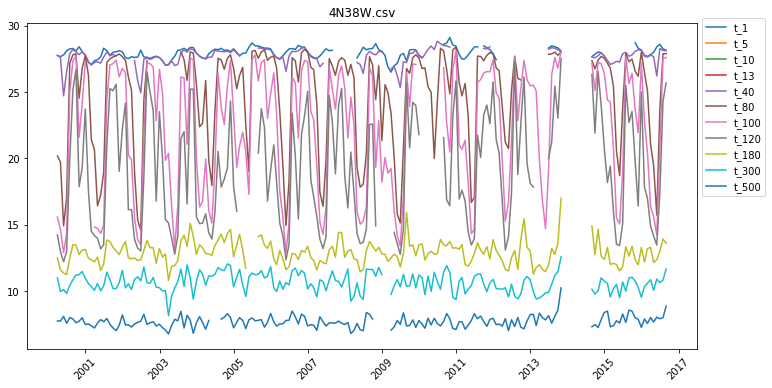

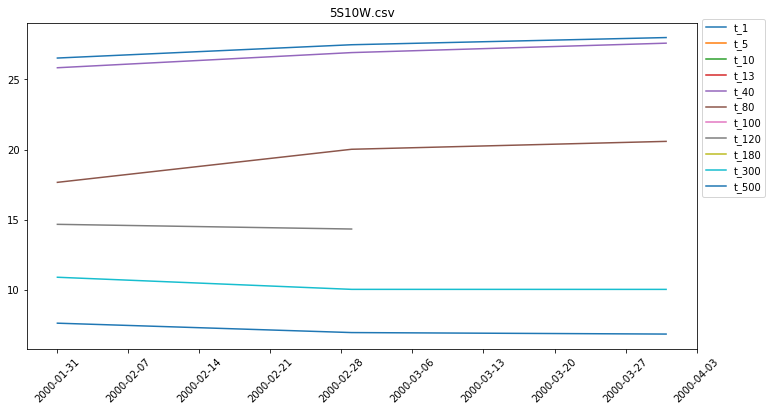

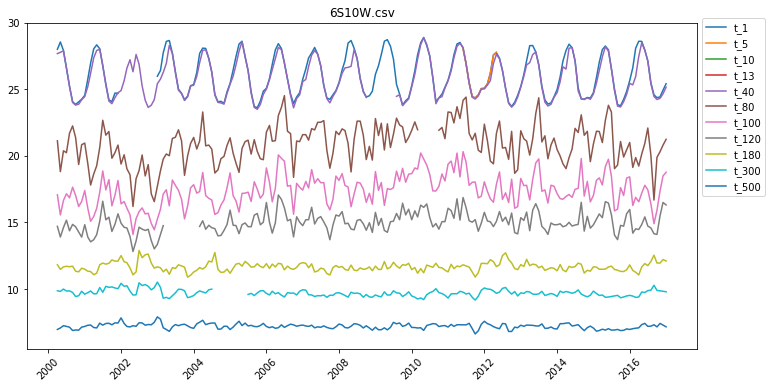

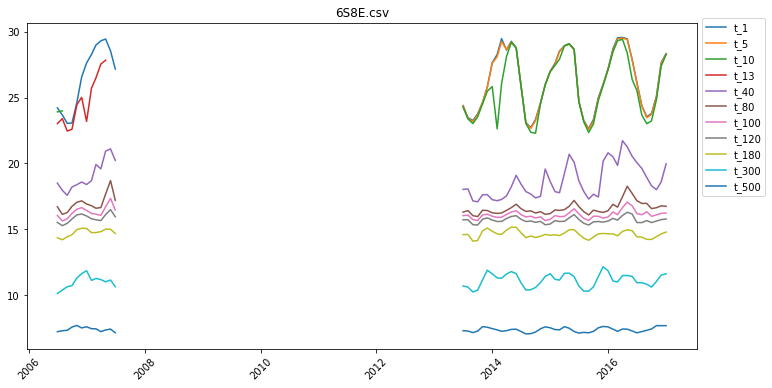

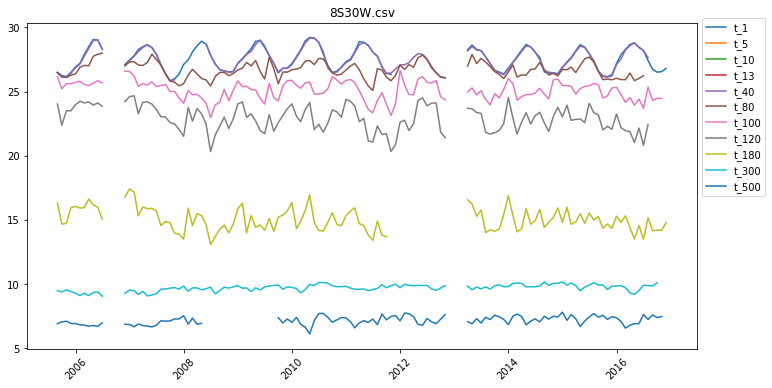

In [3]:
# Lista arquivos da pasta "funceme_db/anomalia/individual"
diretorio_pirata = "pirata_db/"

lista_de_arquivos_individuais = []
arquivos_do_diretorio = os.listdir(diretorio_pirata)

#Plota gráfico com valores de temperatura para cada bóia
for arquivo in arquivos_do_diretorio:
    plot_pirata_media(arquivo)

In [4]:
### Pelas images geradas conclui-se que não é possível se trabalhar com as bóias: 2N10W, 2S10W, 5S10W, 6S8E(grande "buraco" de 2008 até 2014)

# Colocar cada macrorregião em coluna

In [5]:
def plot_funceme_media_by_region(region):
    funceme_df = pd.read_csv("media_chuvas/funceme_media_macrorregiao.csv", index_col=0 ,parse_dates=['datahora'])
    funceme_df = funceme_df.replace(-99999.0, np.nan)
    funceme_df = funceme_df.loc['2005-01-01':'2018-01-01']
    funceme_df = funceme_df.loc[funceme_df['Macrorregioes'] == region]

    x = funceme_df.index
    y_normal = funceme_df["Normal(mm)"].astype(float)
    y_observado = funceme_df["Observado(mm)"].astype(float)
    y_desvio = funceme_df["Desvio(%)"].astype(float)

    plt.figure(figsize=(13, 6))
    plt.plot(x, y_normal, label="Normal(mm)")
    plt.plot(x, y_observado, label="Observado")
#     plt.plot(x, y_desvio, label="Desvio(%)")

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.74))
    plt.xticks(rotation=45)
    plt.title(region)
    plt.show()

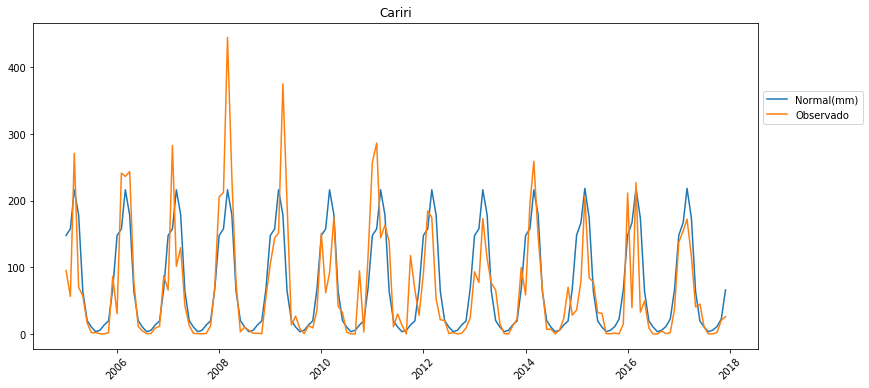

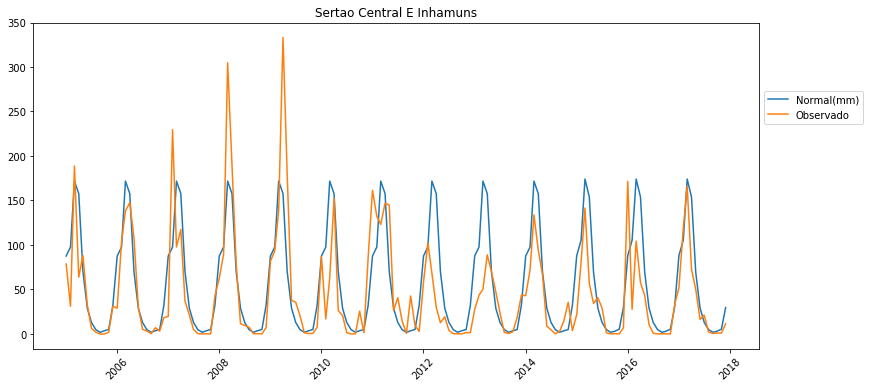

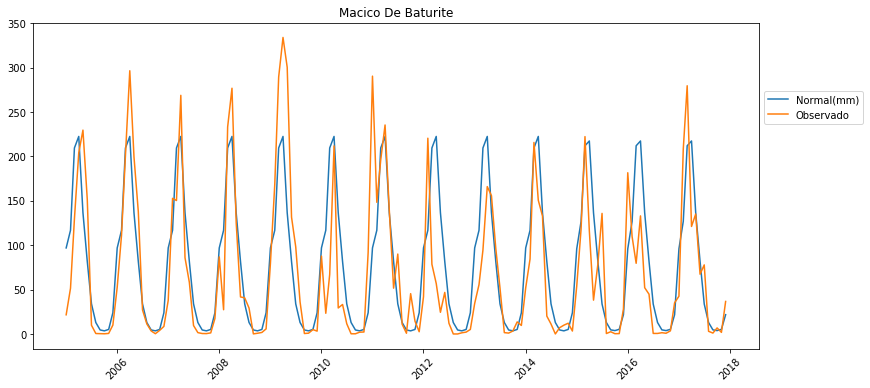

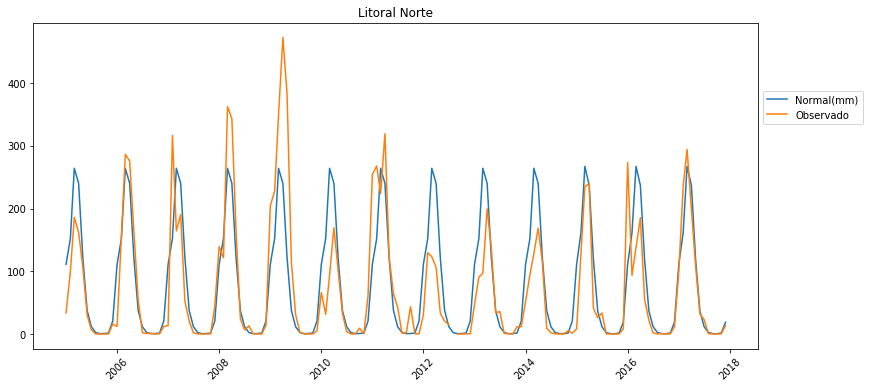

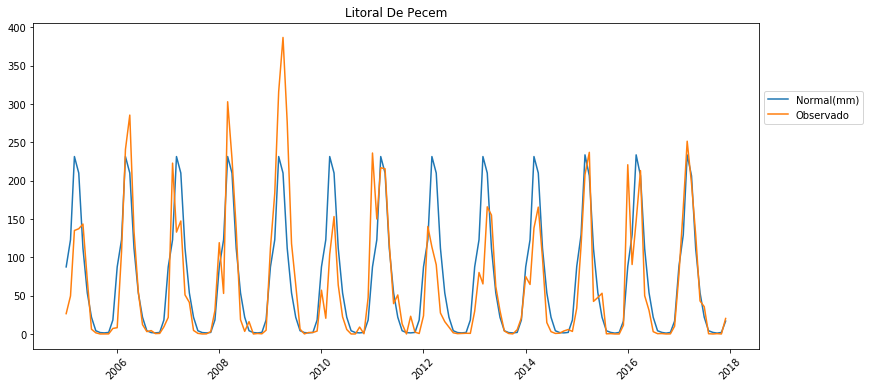

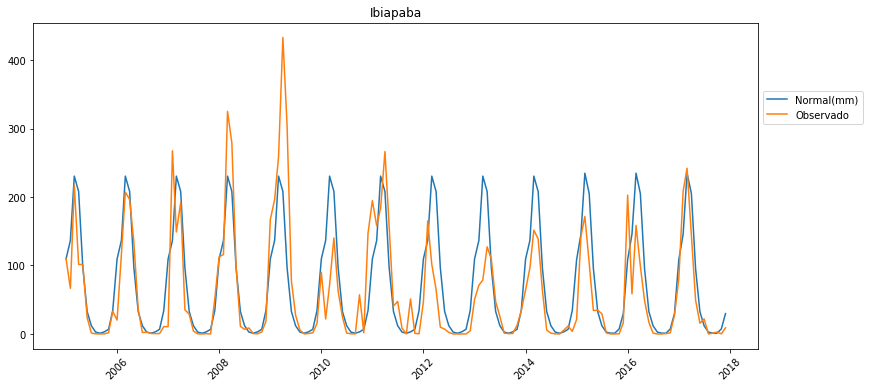

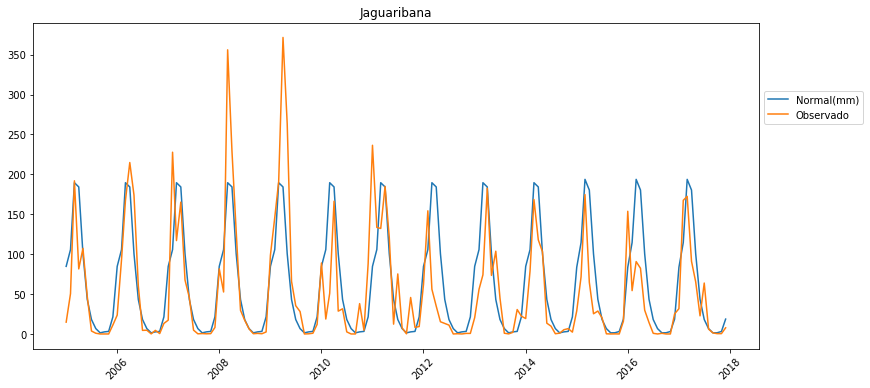

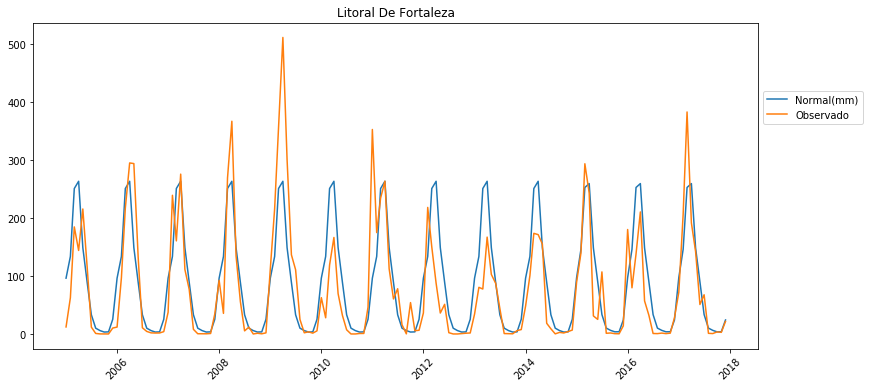

In [6]:
plot_funceme_media_by_region("Cariri")
plot_funceme_media_by_region("Sertao Central E Inhamuns")
plot_funceme_media_by_region("Macico De Baturite")
plot_funceme_media_by_region("Litoral Norte")
plot_funceme_media_by_region("Litoral De Pecem")
plot_funceme_media_by_region("Ibiapaba")
plot_funceme_media_by_region("Jaguaribana")
plot_funceme_media_by_region("Litoral De Fortaleza")


In [7]:
def merge_datasets(pirata_db="0N0E.csv", macroregiao='Litoral De Fortaleza', final_date_range='2018-12-01',
                   initial_date_range='2010-01-01'):
    datahora = 'datahora'
    # read pirata
    pirata_df = pd.read_csv("pirata_db/" + pirata_db, index_col=1, parse_dates=[datahora])
    # read funceme
    funceme_df = pd.read_csv("media_chuvas/funceme_media_macrorregiao.csv", index_col=0, parse_dates=[datahora])
    # Filter funceme data for Fortaleza Macrorregiao
    funceme_df = funceme_df.loc[funceme_df['Macrorregioes'] == macroregiao]
    
    #Drop Unnamed column
    pirata_df.drop(['Unnamed: 0'], 1, inplace=True)
    
    # Deal with missing data
    pirata_df = pirata_df.replace(-99999.0, np.nan)
    funceme_df = funceme_df.replace(-99999.0, np.nan)
    
    # Get PIRATA average by month
    pirata_df = pirata_df.resample('m').mean()
    funceme_df = funceme_df.resample('m').mean()
    
    # Filter date_time range for both datasets
    funceme_df = funceme_df.loc[initial_date_range:final_date_range]
    pirata_df = pirata_df.loc[initial_date_range:final_date_range]

    # Create merged dataframe
    return pd.concat([pirata_df, funceme_df["Normal(mm)"],funceme_df["Observado(mm)"]], axis=1, join_axes=[funceme_df.index])

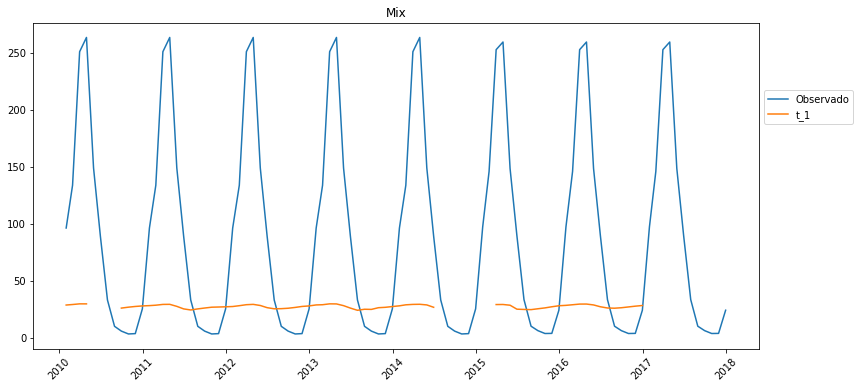

In [8]:
merged_df = merge_datasets()

x = merged_df.index
y_observado = merged_df["Normal(mm)"].astype(float)
y_t_1 = merged_df["t_1"]


plt.figure(figsize=(13, 6))
plt.plot(x, y_observado, label="Observado")
plt.plot(x, y_t_1, label="t_1")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.74))
plt.xticks(rotation=45)
plt.title("Mix")
plt.show()

### Pré-processamento(missing data): Remoção de colunas com tudo sendo NaN

In [9]:
merged_df.dropna(axis=1, how='all', inplace=True)

### Pré-processamento(missing data): Remoção de linhas com qualquer NaN 

In [10]:
merged_df.dropna(axis=0, how='any',inplace=True)

In [11]:
merged_df.head()

,t_1,t_100,t_120,t_140,t_180,t_20,t_300,t_40,t_500,t_60,t_80,Normal(mm),Observado(mm)
datahora,,,,,,,,,,,,,
2010-01-31,28.670000,15.957742,15.530968,15.381935,15.055806,28.435161,10.498387,23.502258,7.289355,19.961290,17.367419,96.2,62.6
2010-02-28,29.122222,16.018571,15.645000,15.413571,15.148214,28.859643,10.585714,23.762500,7.186429,19.424643,17.264286,133.7,27.9
2010-03-31,29.701290,15.783548,15.464839,15.293548,15.062258,29.357742,10.427419,22.994194,6.917742,19.313548,17.037419,250.8,118.9
2010-04-30,29.686154,16.547308,15.725769,15.217308,14.941923,28.185769,10.562692,23.205769,6.979231,19.488846,17.710385,263.3,166.4
2010-09-30,25.985385,16.389231,15.783077,15.309231,14.934615,25.920000,11.071538,24.916923,7.388462,20.295385,17.374615,5.8,0.0


### Pré-processamento (feature scaling)

In [12]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(merged_df), columns=merged_df.columns)
df_scaled.index = merged_df.index

In [13]:
df_scaled = df_scaled.rename(columns={'Normal(mm)':'normal', 'Observado(mm)': 'observado'})

In [14]:
df_scaled.head()

,t_1,t_100,t_120,t_140,t_180,t_20,t_300,t_40,t_500,t_60,t_80,normal,observado
datahora,,,,,,,,,,,,,
2010-01-31,0.817279,0.298314,0.371471,0.589505,0.795307,0.860418,0.244733,0.674341,0.485102,0.467487,0.317044,0.357308,0.177538
2010-02-28,0.897277,0.315266,0.424811,0.612845,0.877317,0.914872,0.288608,0.702025,0.394685,0.403709,0.301159,0.501538,0.079126
2010-03-31,0.999715,0.249771,0.340539,0.524295,0.801033,0.978771,0.209076,0.620296,0.158651,0.390506,0.266214,0.951923,0.337209
2010-04-30,0.997037,0.462612,0.462592,0.468047,0.694238,0.828425,0.277042,0.642802,0.212667,0.411339,0.369871,1.000000,0.471923
2010-09-30,0.342370,0.418560,0.489398,0.535865,0.687752,0.537761,0.532702,0.824827,0.572165,0.507193,0.318153,0.009615,0.000000


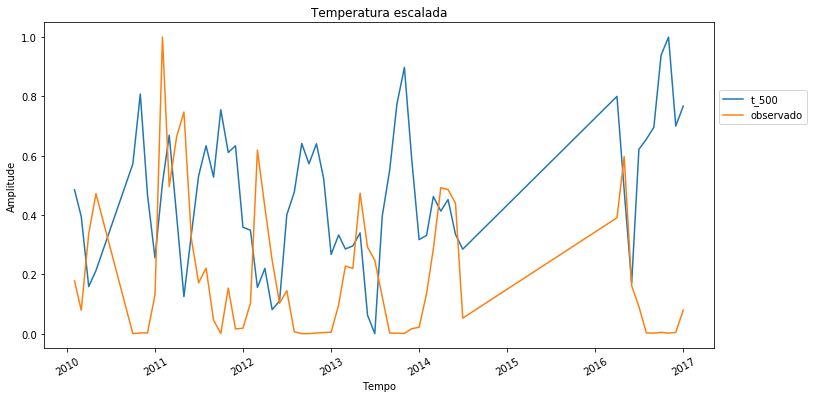

In [15]:
x = df_scaled.index
plt.figure(figsize=(12, 6))
# plt.plot(x, df_scaled['t_1'], label='t_1')
# plt.plot(x, df_scaled['t_20'], label='t_20')
# plt.plot(x, df_scaled['t_40'], label='t_40')
# plt.plot(x, df_scaled['t_80'], label='t_80')
# plt.plot(x, df_scaled['t_100'], label='t_100')
# plt.plot(x, df_scaled['t_120'], label='t_120')
# plt.plot(x, df_scaled['t_140'], label='t_140')
# plt.plot(x, df_scaled['t_180'], label='t_180')
plt.plot(x, df_scaled['t_500'], label='t_500')
# plt.plot(x, df_scaled['normal'], label='normal')
plt.plot(x, df_scaled['observado'], label='observado')
plt.title('Temperatura escalada')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.xticks(rotation=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.74))
plt.show()